In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-13 06:53:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  17.6MB/s    in 18s     

2020-10-13 06:53:37 (17.2 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
# Melakukan extrac file zip
import zipfile,os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [6]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [8]:
train_datagen = ImageDataGenerator(
    rescale = 1./25 5,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4
)

In [20]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100,150),
    shuffle = True,
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100,150),
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [21]:
# Arsitektur CNN
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
])

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [30]:
model.fit(
    train_generator,
    steps_per_epoch = 16,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 4,
    verbose = 2
)

Epoch 1/15
16/16 - 10s - loss: 1.2474 - accuracy: 0.3983 - val_loss: 1.0688 - val_accuracy: 0.3125
Epoch 2/15
16/16 - 10s - loss: 0.9908 - accuracy: 0.5124 - val_loss: 0.8139 - val_accuracy: 0.6641
Epoch 3/15
16/16 - 10s - loss: 0.6639 - accuracy: 0.7422 - val_loss: 0.6772 - val_accuracy: 0.7109
Epoch 4/15
16/16 - 10s - loss: 0.5533 - accuracy: 0.7754 - val_loss: 0.5068 - val_accuracy: 0.7734
Epoch 5/15
16/16 - 10s - loss: 0.4072 - accuracy: 0.8340 - val_loss: 0.3369 - val_accuracy: 0.8906
Epoch 6/15
16/16 - 10s - loss: 0.3163 - accuracy: 0.8880 - val_loss: 0.4098 - val_accuracy: 0.8594
Epoch 7/15
16/16 - 10s - loss: 0.3149 - accuracy: 0.8652 - val_loss: 0.3277 - val_accuracy: 0.8828
Epoch 8/15
16/16 - 9s - loss: 0.3886 - accuracy: 0.8340 - val_loss: 0.3338 - val_accuracy: 0.8672
Epoch 9/15
16/16 - 10s - loss: 0.2768 - accuracy: 0.8984 - val_loss: 0.3065 - val_accuracy: 0.9062
Epoch 10/15
16/16 - 10s - loss: 0.2125 - accuracy: 0.9336 - val_loss: 0.1746 - val_accuracy: 0.9375
Epoch 11/1

In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 1lEpWTJDphkm3HdC.png to 1lEpWTJDphkm3HdC.png
1lEpWTJDphkm3HdC.png
scissors


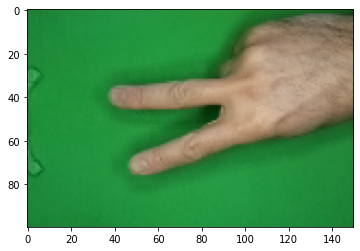

In [37]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')
  else:
    print('unknown')

**Nama** : Muhammad Fikrie

**Tempat/Tanggal Lahir** : Jakarta, 08 November 1999

**Alamat** : Jl. Dr. Susilo 2A No.4, Grogol - Jakarta Barat.

**E-mail** : muhammadfikrie1108@gmail.com

**No Tlp** : 085719503142

data yang dapat di gunakan ada di folder rps-cv-images

semoga dari submission ini dapat pengetahuan lebih luas lagi dari machine learning ini dan dapat di gunakan di dunia kerja nanti.

Terima kasih Admin yang sudah memberi saya kesempatan untuk menuntut ilmu di Platform Dicoding